In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

Compiling complete dataframe

In [2]:
df_knn = pd.read_csv("df_guai_tfidf.csv")

In [3]:
df_knn

,index,tfidf_0,tfidf_1,tfidf_2,tfidf_3,tfidf_4,tfidf_5,tfidf_6,tfidf_7,tfidf_8,...,sweet,tar,tea,tobacco,tree,tropical,vanilla,violet,woody,X..Guaiol
0,0,0.0,0.21444,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0.444444
1,0,0.0,0.21444,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0.444444
2,0,0.0,0.21444,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0.444444
3,2,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.324705,...,1,0,0,0,0,0,1,0,0,0.444444
4,2,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.324705,...,1,0,0,0,0,0,1,0,0,0.444444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,42969,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0.222222
74996,42972,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0.222222
74997,42972,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0.222222
74998,42976,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,1,1,1,1,1,1,1,1,1,0.222222


Splitting dependent and independent variables

In [4]:
X = df_knn.drop(['X..Guaiol', 'index'], axis = 1)
y = df_knn[['X..Guaiol']]

Plotting histograms on target variable

In [5]:
y_array = y.to_numpy()
y_array

array([[0.44444444],
       [0.44444444],
       [0.44444444],
       ...,
       [0.22222222],
       [0.22222222],
       [0.22222222]])

<AxesSubplot:ylabel='Count'>

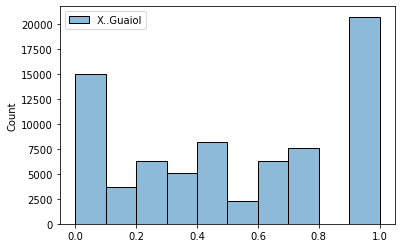

In [6]:
sns.histplot(y, bins = 10)

Train test split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [8]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.25)

kNN modeling (before Feature selection and Hyperparameter Tuning)

In [9]:
knreg = KNeighborsRegressor()
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [10]:
mean_absolute_error(y_val, y_pred_knreg)

0.0910250979514313

In [11]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.8650118145881992

In [12]:
#val
r2_score(y_val, y_pred_knreg)

0.7703438624926076

Feature Selection

In [13]:
rfreg = RandomForestRegressor()

In [14]:
selector = SelectFromModel(rfreg).fit(X_train1, y_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


In [15]:
selector.estimator_.feature_importances_

array([6.14185723e-04, 7.37231660e-04, 2.19351037e-03, 1.19383657e-03,
       4.85815811e-04, 3.21404310e-03, 5.53653257e-04, 4.00118935e-03,
       2.89701469e-04, 6.72721501e-04, 1.93340359e-03, 2.32194435e-03,
       2.54755343e-04, 2.13697793e-04, 7.01409067e-04, 2.06285857e-04,
       6.90646325e-04, 7.02661950e-04, 4.28025939e-04, 1.39284446e-03,
       1.08316373e-03, 9.65860028e-04, 7.42389778e-04, 3.45382274e-04,
       2.68927032e-04, 1.51417693e-04, 2.30139407e-03, 2.52838726e-04,
       1.30630060e-03, 4.18372349e-04, 3.57487803e-03, 3.94182104e-04,
       2.27199524e-03, 3.87362644e-04, 1.38555238e-03, 1.68285384e-04,
       4.86082079e-05, 2.94316850e-03, 1.64582900e-04, 7.58560515e-04,
       1.92553007e-04, 3.18950811e-04, 3.03141865e-04, 2.45251918e-03,
       5.08470923e-04, 8.75056367e-04, 1.96867659e-03, 3.62126508e-04,
       1.12228302e-03, 1.18082770e-03, 2.58209778e-04, 5.93926177e-04,
       3.64383592e-04, 7.75826607e-04, 1.37710401e-03, 3.49530994e-04,
      

In [16]:
selector.threshold_

0.0021321961620469083

In [17]:
mask = selector.get_support()

In [18]:
mask

array([False, False,  True, False, False,  True, False,  True, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False,  True, False,  True, False, False, False,
       False,  True, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True, False,  True, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True, False,  True, False, False,
       False, False,

In [19]:
selected_features = X.columns[mask]

In [20]:
selected_X = df_knn[selected_features]
selected_X

,tfidf_2,tfidf_5,tfidf_7,tfidf_11,tfidf_26,tfidf_30,tfidf_32,tfidf_37,tfidf_43,tfidf_73,...,berry,blueberry,citrus,diesel,earthy,grape,lemon,orange,sage,skunk
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.14162,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.14162,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.14162,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.198545,0.0,...,1,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.198545,0.0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
74996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
74997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
74998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,...,1,1,1,1,1,1,1,1,1,1


In [21]:
selected_X.columns.to_list()

['tfidf_2',
 'tfidf_5',
 'tfidf_7',
 'tfidf_11',
 'tfidf_26',
 'tfidf_30',
 'tfidf_32',
 'tfidf_37',
 'tfidf_43',
 'tfidf_73',
 'tfidf_74',
 'tfidf_75',
 'tfidf_78',
 'tfidf_93',
 'tfidf_94',
 'tfidf_96',
 'tfidf_101',
 'tfidf_119',
 'tfidf_121',
 'tfidf_123',
 'tfidf_128',
 'tfidf_138',
 'tfidf_141',
 'tfidf_144',
 'tfidf_145',
 'tfidf_149',
 'tfidf_158',
 'tfidf_161',
 'tfidf_162',
 'tfidf_167',
 'tfidf_168',
 'tfidf_173',
 'tfidf_189',
 'tfidf_199',
 'tfidf_207',
 'tfidf_210',
 'tfidf_211',
 'tfidf_230',
 'tfidf_239',
 'tfidf_240',
 'tfidf_245',
 'tfidf_247',
 'tfidf_253',
 'tfidf_257',
 'tfidf_258',
 'tfidf_281',
 'tfidf_285',
 'tfidf_297',
 'tfidf_309',
 'tfidf_312',
 'tfidf_320',
 'tfidf_329',
 'tfidf_337',
 'tfidf_340',
 'tfidf_345',
 'tfidf_357',
 'tfidf_361',
 'tfidf_362',
 'tfidf_366',
 'hybrid',
 'sativa',
 'creative',
 'dry mouth',
 'energetic',
 'euphoric',
 'focused',
 'giggly',
 'happy',
 'relaxed',
 'sleepy',
 'uplifted',
 'berry',
 'blueberry',
 'citrus',
 'diesel',
 '

In [22]:
import joblib

joblib.dump(selected_X, "selected_X_knn_tfidf_guai.pkl")
joblib.dump(selector, "selector_knn_tfidf_guai.pkl")

['selector_knn_tfidf_guai.pkl']

Train test split (after Feature Selection)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, random_state=1, test_size=0.2)

In [24]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

In [25]:
knreg.fit(X_train1, y_train1)
y_pred_knreg = knreg.predict(X_val)
y_pred_knreg_r2 = knreg.predict(X_train1)

In [26]:
mean_absolute_error(y_val, y_pred_knreg)

0.08879780508072174

In [27]:
mean_squared_error(y_val, y_pred_knreg)

0.03056878673259532

In [28]:
mean_squared_error(y_val, y_pred_knreg, squared = False)

0.17483931689581528

In [29]:
#train
r2_score(y_train1, y_pred_knreg_r2)

0.8784739774435963

In [30]:
#val
r2_score(y_val, y_pred_knreg)

0.7825963335834631

Hyperparameter Tuning

In [31]:
parameters_knn = {'n_neighbors' : [5, 7, 9, 11, 13, 15], 
              'weights': ['uniform', 'distance']}

In [32]:
rscv_knn = RandomizedSearchCV(knreg,  
                     parameters_knn,   
                     cv=5, 
                     scoring='neg_mean_absolute_error')

In [33]:
rscv_knn.fit(X_train1, y_train1)

RandomizedSearchCV(cv=5, estimator=KNeighborsRegressor(),
                   param_distributions={'n_neighbors': [5, 7, 9, 11, 13, 15],
                                        'weights': ['uniform', 'distance']},
                   scoring='neg_mean_absolute_error')

In [34]:
rscv_knn.best_params_

{'weights': 'distance', 'n_neighbors': 5}

kNN (after hyperparameter tuning)

In [35]:
knreg_ht = KNeighborsRegressor(n_neighbors = 5, weights = 'distance')
knreg_ht.fit(X_train1, y_train1)
y_pred_knreg_ht = knreg_ht.predict(X_val)
y_pred_knreg_ht_r2 = knreg_ht.predict(X_train1)

In [36]:
mean_absolute_error(y_val, y_pred_knreg_ht)

0.04829444491858779

In [37]:
mean_squared_error(y_val, y_pred_knreg_ht)

0.019974991076796827

In [38]:
mean_squared_error(y_val, y_pred_knreg_ht, squared = False)

0.1413329086829986

In [39]:
#train
r2_score(y_train1, y_pred_knreg_ht_r2)

0.9865610227731325

In [40]:
#val
r2_score(y_val, y_pred_knreg_ht)

0.8579388729189337

Residual plots after Hyperparameter Tuning

Predicting model on the test set

In [41]:
y_pred_knreg_test = knreg_ht.predict(X_test)

In [42]:
joblib.dump(y_pred_knreg_test, "y_pred_knreg_test_tfidf_guai.pkl")
joblib.dump(y_test, "y_test_knreg_tfidf_guai.pkl")

['y_test_knreg_tfidf_guai.pkl']

In [43]:
mean_absolute_error(y_test, y_pred_knreg_test)

0.044398722900342094

In [44]:
r2_score(y_test, y_pred_knreg_test)

0.8750773989935943

In [45]:
mean_squared_error(y_test, y_pred_knreg_test)

0.017981337164324776

In [46]:
mean_squared_error(y_test, y_pred_knreg_test, squared = False)

0.134094508330225

In [47]:
y_test

,X..Guaiol
11591,1.000000
52020,0.000000
34666,0.777778
22169,1.000000
23049,1.000000
...,...
60863,0.277778
32316,0.000000
60933,0.277778
43206,0.666667


In [48]:
type(y_pred_knreg_test)

numpy.ndarray

Error analysis

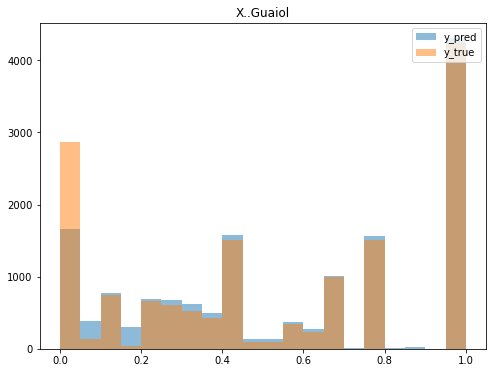

<Figure size 432x288 with 0 Axes>

In [49]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..Guaiol"  # specify the target variable name
ax.hist(y_pred_knreg_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_knn_tfidf_guai.png')

Pearson R

In [50]:
corr_coef, p_value = pearsonr(y_pred_knreg_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.938
P-value: 0.000


<AxesSubplot:>

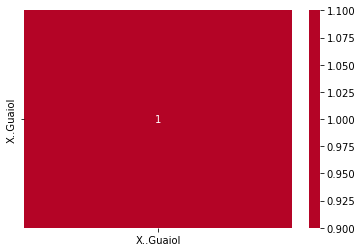

In [51]:
corr_matrix = y_test.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)